## Preprocessing

In [ ]:
# Import our dependencies
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
import pandas as pd
import matplotlib as plt
import tensorflow as tf

# Set the random seeds so script is consistent every run
# Keras Tuner relies on TensorFlow’s random seed
import random
seed = 42
tf.random.set_seed(seed)
random.seed(seed)

#  Import and read the charity_data.csv.
application_df = pd.read_csv('../Resources/charity_data.csv')
application_df.head()

,EIN,NAME,APPLICATION_TYPE,AFFILIATION,CLASSIFICATION,USE_CASE,ORGANIZATION,STATUS,INCOME_AMT,SPECIAL_CONSIDERATIONS,ASK_AMT,IS_SUCCESSFUL
0,10520599,BLUE KNIGHTS MOTORCYCLE CLUB,T10,Independent,C1000,ProductDev,Association,1,0,N,5000,1
1,10531628,AMERICAN CHESAPEAKE CLUB CHARITABLE TR,T3,Independent,C2000,Preservation,Co-operative,1,1-9999,N,108590,1
2,10547893,ST CLOUD PROFESSIONAL FIREFIGHTERS,T5,CompanySponsored,C3000,ProductDev,Association,1,0,N,5000,0
3,10553066,SOUTHSIDE ATHLETIC ASSOCIATION,T3,CompanySponsored,C2000,Preservation,Trust,1,10000-24999,N,6692,1
4,10556103,GENETIC RESEARCH INSTITUTE OF THE DESERT,T3,Independent,C1000,Heathcare,Trust,1,100000-499999,N,142590,1


In [2]:
# Check for null values
application_df.isnull().sum()

EIN                       0
NAME                      0
APPLICATION_TYPE          0
AFFILIATION               0
CLASSIFICATION            0
USE_CASE                  0
ORGANIZATION              0
STATUS                    0
INCOME_AMT                0
SPECIAL_CONSIDERATIONS    0
ASK_AMT                   0
IS_SUCCESSFUL             0
dtype: int64

In [3]:
# Check for duplicated values
application_df.duplicated().sum()

0

In [4]:
# Drop the non-beneficial ID columns, 'EIN' and 'NAME'.
application_df.drop(columns=['EIN','NAME'], inplace=True)
application_df.head()

,APPLICATION_TYPE,AFFILIATION,CLASSIFICATION,USE_CASE,ORGANIZATION,STATUS,INCOME_AMT,SPECIAL_CONSIDERATIONS,ASK_AMT,IS_SUCCESSFUL
0,T10,Independent,C1000,ProductDev,Association,1,0,N,5000,1
1,T3,Independent,C2000,Preservation,Co-operative,1,1-9999,N,108590,1
2,T5,CompanySponsored,C3000,ProductDev,Association,1,0,N,5000,0
3,T3,CompanySponsored,C2000,Preservation,Trust,1,10000-24999,N,6692,1
4,T3,Independent,C1000,Heathcare,Trust,1,100000-499999,N,142590,1


In [5]:
# Determine the number of unique values in each column.
application_df.nunique()

APPLICATION_TYPE            17
AFFILIATION                  6
CLASSIFICATION              71
USE_CASE                     5
ORGANIZATION                 4
STATUS                       2
INCOME_AMT                   9
SPECIAL_CONSIDERATIONS       2
ASK_AMT                   8747
IS_SUCCESSFUL                2
dtype: int64

In [6]:
# Look at APPLICATION_TYPE value counts for binning
app_count = application_df['APPLICATION_TYPE'].value_counts()
app_count

APPLICATION_TYPE
T3     27037
T4      1542
T6      1216
T5      1173
T19     1065
T8       737
T7       725
T10      528
T9       156
T13       66
T12       27
T2        16
T25        3
T14        3
T29        2
T15        2
T17        1
Name: count, dtype: int64

In [7]:
# Choose a cutoff value and create a list of application types to be replaced
# use the variable name `application_types_to_replace`
application_types_to_replace = []

for i, v in app_count.items():
  if v < 528:
    application_types_to_replace.append(i)

# Replace in dataframe
for app in application_types_to_replace:
    application_df['APPLICATION_TYPE'] = application_df['APPLICATION_TYPE'].replace(app,"Other")

# Check to make sure binning was successful
application_df['APPLICATION_TYPE'].value_counts()

APPLICATION_TYPE
T3       27037
T4        1542
T6        1216
T5        1173
T19       1065
T8         737
T7         725
T10        528
Other      276
Name: count, dtype: int64

In [8]:
# Look at CLASSIFICATION value counts for binning
application_df['CLASSIFICATION'].value_counts()

CLASSIFICATION
C1000    17326
C2000     6074
C1200     4837
C3000     1918
C2100     1883
         ...  
C4120        1
C8210        1
C2561        1
C4500        1
C2150        1
Name: count, Length: 71, dtype: int64

In [9]:
# You may find it helpful to look at CLASSIFICATION value counts >1
class_counts = application_df['CLASSIFICATION'].value_counts()

for i, v in class_counts.items():
  if v > 1:
    print(i, v)

C1000 17326
C2000 6074
C1200 4837
C3000 1918
C2100 1883
C7000 777
C1700 287
C4000 194
C5000 116
C1270 114
C2700 104
C2800 95
C7100 75
C1300 58
C1280 50
C1230 36
C1400 34
C7200 32
C2300 32
C1240 30
C8000 20
C7120 18
C1500 16
C1800 15
C6000 15
C1250 14
C8200 11
C1238 10
C1278 10
C1235 9
C1237 9
C7210 7
C2400 6
C1720 6
C4100 6
C1257 5
C1600 5
C1260 3
C2710 3
C0 3
C3200 2
C1234 2
C1246 2
C1267 2
C1256 2


In [10]:
# Choose a cutoff value and create a list of classifications to be replaced
# use the variable name `classifications_to_replace`
classifications_to_replace = []

for i, v in class_counts.items():
  if v < 1883:
    classifications_to_replace.append(i)

# Replace in dataframe
for cls in classifications_to_replace:
    application_df['CLASSIFICATION'] = application_df['CLASSIFICATION'].replace(cls,"Other")

# Check to make sure binning was successful
application_df['CLASSIFICATION'].value_counts()

CLASSIFICATION
C1000    17326
C2000     6074
C1200     4837
Other     2261
C3000     1918
C2100     1883
Name: count, dtype: int64

In [11]:
# Convert categorical data to numeric with `pd.get_dummies`
application_df_dummies = pd.get_dummies(application_df)
application_df_dummies = application_df_dummies.astype(int)
application_df_dummies.head()

,STATUS,ASK_AMT,IS_SUCCESSFUL,APPLICATION_TYPE_Other,APPLICATION_TYPE_T10,APPLICATION_TYPE_T19,APPLICATION_TYPE_T3,APPLICATION_TYPE_T4,APPLICATION_TYPE_T5,APPLICATION_TYPE_T6,...,INCOME_AMT_1-9999,INCOME_AMT_10000-24999,INCOME_AMT_100000-499999,INCOME_AMT_10M-50M,INCOME_AMT_1M-5M,INCOME_AMT_25000-99999,INCOME_AMT_50M+,INCOME_AMT_5M-10M,SPECIAL_CONSIDERATIONS_N,SPECIAL_CONSIDERATIONS_Y
0,1,5000,1,0,1,0,0,0,0,0,...,0,0,0,0,0,0,0,0,1,0
1,1,108590,1,0,0,0,1,0,0,0,...,1,0,0,0,0,0,0,0,1,0
2,1,5000,0,0,0,0,0,0,1,0,...,0,0,0,0,0,0,0,0,1,0
3,1,6692,1,0,0,0,1,0,0,0,...,0,1,0,0,0,0,0,0,1,0
4,1,142590,1,0,0,0,1,0,0,0,...,0,0,1,0,0,0,0,0,1,0


In [12]:
# Split our preprocessed data into our features and target arrays
y = application_df_dummies['IS_SUCCESSFUL']
X = application_df_dummies.drop(columns=['IS_SUCCESSFUL'])

# Split the preprocessed data into a training and testing dataset
X_train, X_test, y_train, y_test = train_test_split(X, y, random_state=1)

In [13]:
# Create a StandardScaler instances
scaler = StandardScaler()

# Fit the StandardScaler
X_scaler = scaler.fit(X_train)

# Scale the data
X_train_scaled = X_scaler.transform(X_train)
X_test_scaled = X_scaler.transform(X_test)

## Use Keras Tuner to opitmize the parameters

In [14]:
# Create a method that creates a new Sequential model with hyperparameter options
# Change from Optimization V1: 
# (1) Added a learning rate choice: Allow Keras Tuner to explore different learning rates. The learning rate is a critical hyperparameter that can significantly impact the training of the model.
# (2) Dropout Layers: Include dropout layers to reduce overfitting by randomly setting a fraction of input units to 0 at each update during training.
# (3) Regularization: Add L2 regularization to the dense layers to help prevent overfitting.
def create_model(hp):
    nn = tf.keras.models.Sequential()

    input_features = X_train_scaled.shape[1] 

    # Activation function choice
    activation = hp.Choice('activation', ['relu', 'tanh'])

    # Learning rate choice
    learning_rate = hp.Float('learning_rate', min_value=1e-5, max_value=1e-2, sampling='LOG', default=1e-3)
    optimizer = tf.keras.optimizers.Adam(learning_rate=learning_rate)

    # Input layer
    nn.add(tf.keras.Input(shape=(input_features,)))

    # First dense layer with L2 regularization
    regularization_strength = hp.Float('regularization_strength', min_value=1e-5, max_value=1e-2, default=1e-4, step=1e-5)
    nn.add(tf.keras.layers.Dense(
        units=hp.Int('first_units', min_value=1, max_value=80, step=5), 
        activation=activation,
        kernel_regularizer=tf.keras.regularizers.l2(regularization_strength)
    ))

    # Additional hidden layers with dropout
    for i in range(hp.Int('num_layers', 1, 5)):
        nn.add(tf.keras.layers.Dense(
            units=hp.Int('units_' + str(i), min_value=1, max_value=40, step=5), 
            activation=activation,
            kernel_regularizer=tf.keras.regularizers.l2(regularization_strength)
        ))
        nn.add(tf.keras.layers.Dropout(rate=hp.Float('dropout_rate', min_value=0.0, max_value=0.5, step=0.1)))

    # Output layer
    nn.add(tf.keras.layers.Dense(units=1, activation="sigmoid"))

    # Compile the model
    nn.compile(loss="binary_crossentropy", optimizer=optimizer, metrics=["accuracy"])

    return nn

In [ ]:
# Import the kerastuner library
import keras_tuner as kt

tuner = kt.Hyperband(
    create_model,
    objective="val_accuracy",
    max_epochs=20,
    hyperband_iterations=2,
    directory="tuning_directory",  # New directory for storing tuner state
    project_name="experiment_2"  # Custom project name
    )

In [16]:
# Run the kerastuner search for best hyperparameters
tuner.search(X_train_scaled,y_train,epochs=20,validation_data=(X_test_scaled,y_test))

Trial 60 Complete [00h 00m 19s]
val_accuracy: 0.7240816354751587

Best val_accuracy So Far: 0.7316617965698242
Total elapsed time: 00h 06m 39s


In [17]:
# Evaluate the top 3 models against the test dataset
top_models = tuner.get_best_models(3)
for model in top_models:
    model_loss, model_accuracy = model.evaluate(X_test_scaled,y_test,verbose=2)
    print(f"Loss: {model_loss}, Accuracy: {model_accuracy}")

268/268 - 0s - 1ms/step - accuracy: 0.7317 - loss: 0.5632
Loss: 0.563169538974762, Accuracy: 0.7316617965698242
268/268 - 0s - 1ms/step - accuracy: 0.7315 - loss: 0.6151
Loss: 0.6150985956192017, Accuracy: 0.7315452098846436
268/268 - 0s - 2ms/step - accuracy: 0.7314 - loss: 0.6090
Loss: 0.6089536547660828, Accuracy: 0.7314285635948181


In [18]:
# Top model hyperparameters
top_model_hyper = tuner.get_best_hyperparameters(1)[0]
top_model_hyper.values

{'activation': 'relu',
 'learning_rate': 0.000675163502420857,
 'regularization_strength': 0.0030800000000000003,
 'first_units': 46,
 'num_layers': 1,
 'units_0': 26,
 'dropout_rate': 0.0,
 'units_1': 1,
 'units_2': 11,
 'units_3': 36,
 'units_4': 26,
 'tuner/epochs': 20,
 'tuner/initial_epoch': 7,
 'tuner/bracket': 1,
 'tuner/round': 1,
 'tuner/trial_id': '0053'}

In [19]:
# Export our model to HDF5 (or keras) file
top_model = tuner.get_best_models(1)[0]
model_loss, model_accuracy = top_model.evaluate(X_test_scaled,y_test,verbose=2)
print(f"Loss: {model_loss}, Accuracy: {model_accuracy}")
top_model.save("../Models_keras_files/AlphabetSoupCharity_Optimized_V2.h5")
top_model.save("../Models_keras_files/AlphabetSoupCharity_Optimized_V2.keras")

268/268 - 0s - 1ms/step - accuracy: 0.7317 - loss: 0.5632


Loss: 0.563169538974762, Accuracy: 0.7316617965698242


## Build a model using the parameters from the best Keras Tuner model


In [20]:
input_dim = len(X_train_scaled[0]) # This calculates the length of the first row of X_train_scaled, which gives the number of features. It's functionally correct, but slightly less direct because it depends on accessing the first row.
input_features = X_train_scaled.shape[1] # This accesses the second dimension (columns) of the array directly. It's more concise and easier to understand.

best_nn = tf.keras.models.Sequential() # initializing an empty Sequential model

# Input layer
#best_nn.add(tf.keras.layers.Dense(units=top_model_hyper.values['first_units'], input_dim=input_dim, activation=top_model_hyper.values['activation']))
best_nn.add(tf.keras.Input(shape=(input_features,))) # Recommended approach - Define input layer separately
best_nn.add(tf.keras.layers.Dense(units=top_model_hyper.values['first_units'], activation=top_model_hyper.values['activation']))

# Loop through to create the hidden layers
for i in range(top_model_hyper.values['num_layers']):
  best_nn.add(tf.keras.layers.Dense(units=top_model_hyper.values['units_'+ str(i)], activation=top_model_hyper.values['activation']))

# Output layer
best_nn.add(tf.keras.layers.Dense(units=1, activation="sigmoid"))

# Check the model structure
best_nn.summary()

Model: "sequential_1"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ dense_3 (Dense)                 │ (None, 46)             │         2,024 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_4 (Dense)                 │ (None, 26)             │         1,222 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_5 (Dense)                 │ (None, 1)              │            27 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 3,273 (12.79 KB)

 Trainable params: 3,273 (12.79 KB)

 Non-trainable params: 0 (0.00 B)

In [21]:
# Compile the best model
best_nn.compile(loss="binary_crossentropy", optimizer="adam", metrics=["accuracy"])

In [22]:
# Train the best model
fit_best_model = best_nn.fit(X_train_scaled, y_train, epochs=100)

Epoch 1/100
804/804 ━━━━━━━━━━━━━━━━━━━━ 1s 510us/step - accuracy: 0.6967 - loss: 0.6000
Epoch 2/100
804/804 ━━━━━━━━━━━━━━━━━━━━ 1s 624us/step - accuracy: 0.7308 - loss: 0.5520
Epoch 3/100
804/804 ━━━━━━━━━━━━━━━━━━━━ 0s 538us/step - accuracy: 0.7302 - loss: 0.5539
Epoch 4/100
804/804 ━━━━━━━━━━━━━━━━━━━━ 0s 396us/step - accuracy: 0.7322 - loss: 0.5475
Epoch 5/100
804/804 ━━━━━━━━━━━━━━━━━━━━ 0s 587us/step - accuracy: 0.7313 - loss: 0.5486
Epoch 6/100
804/804 ━━━━━━━━━━━━━━━━━━━━ 1s 993us/step - accuracy: 0.7322 - loss: 0.5498
Epoch 7/100
804/804 ━━━━━━━━━━━━━━━━━━━━ 1s 780us/step - accuracy: 0.7311 - loss: 0.5489
Epoch 8/100
804/804 ━━━━━━━━━━━━━━━━━━━━ 1s 711us/step - accuracy: 0.7326 - loss: 0.5436
Epoch 9/100
804/804 ━━━━━━━━━━━━━━━━━━━━ 1s 966us/step - accuracy: 0.7307 - loss: 0.5494
Epoch 10/100
804/804 ━━━━━━━━━━━━━━━━━━━━ 1s 899us/step - accuracy: 0.7303 - loss: 0.5482
Epoch 11/100
804/804 ━━━━━━━━━━━━━━━━━━━━ 1s 737us/step - accuracy: 0.7342 - loss: 0.5437
Epoch 12/100
804/80

In [23]:
# Evaluate the best model using the test data
model_loss, model_accuracy = best_nn.evaluate(X_test_scaled,y_test,verbose=2)
print(f"Loss: {model_loss}, Accuracy: {model_accuracy}")

268/268 - 0s - 805us/step - accuracy: 0.7289 - loss: 0.5551
Loss: 0.5550805330276489, Accuracy: 0.728863000869751


<Axes: >

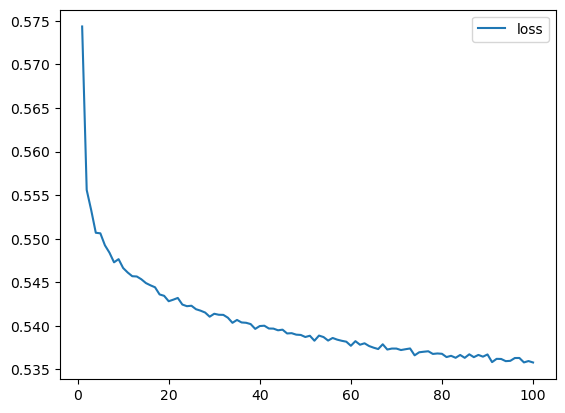

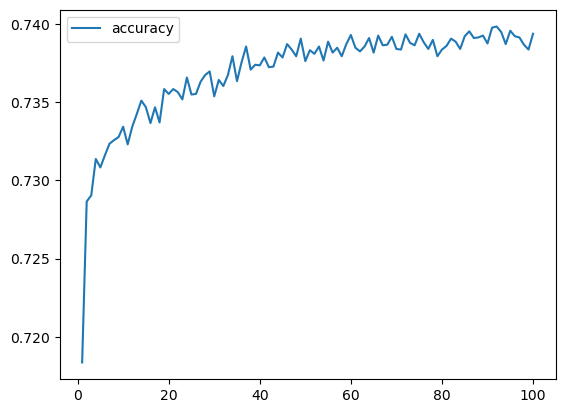

In [24]:
# Create a DataFrame containing training history of the model
history_df = pd.DataFrame(fit_best_model.history)

# Increase the index by 1 to match the number of epochs
history_df.index += 1

# Plot the loss
history_df.plot(y='loss')

# Plot the accuracy
history_df.plot(y='accuracy')